In [1]:
# 必要なモジュールと自作魔法集の読み込み
import numpy as np
import matplotlib.pyplot as plt

import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
import chainer.datasets as ds
import chainer.dataset.convert as con
from chainer import Variable, Chain, config

import princess_nogpu as ohm

In [2]:
# fashion_mnist のデータセットの読み込み
train, test = ds.get_fashion_mnist()
xtrain, ttrain = con.concat_examples(train)
xtest, ttest = con.concat_examples(test)

60000 784


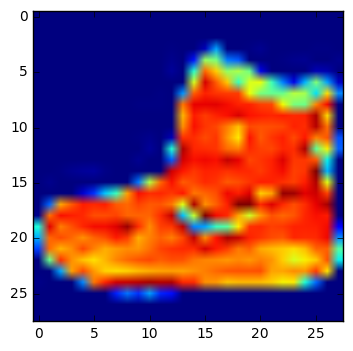

In [11]:
# データの形と画像の一例を表示する
Dtrain, N = xtrain.shape
print(Dtrain, N)
plt.imshow(xtrain[0,:].reshape(28, 28))
plt.show()

In [12]:
# ２層のニューラルネットワークを呼び出して関数化
C = ttrain.max() + 1

NN = Chain(l1=L.Linear(N, 400), l2=L.Linear(400,C), bnorm1 = L.BatchNormalization(400))

def model(x):
    h = NN.l1(x)
    h = F.relu(h)
    h = NN.bnorm1(h)
    y = NN.l2(h)
    return y

In [13]:
# GPGPUの設定は省略

In [14]:
# 最適化手法の設定
optNN = Opt.MomentumSGD()
optNN.setup(NN)

# データと学習の記録を残す場所を用意
train_loss = []
train_acc = []
test_loss = []
test_acc = []
result = [train_loss, test_loss, train_acc, test_acc]
data = [xtrain, xtest, ttrain, ttest]

In [16]:
# 自作モジュールから結界を張り学習を実行
ohm.learning_classification(model, optNN, data,result, 100)

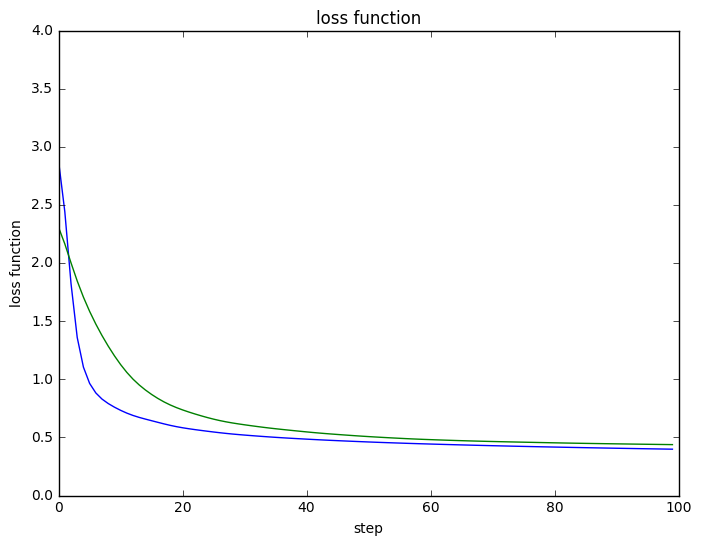

In [18]:
ohm.plot_result2(result[0], result[1], "loss function", "step", "loss function", 0.0, 4.0)

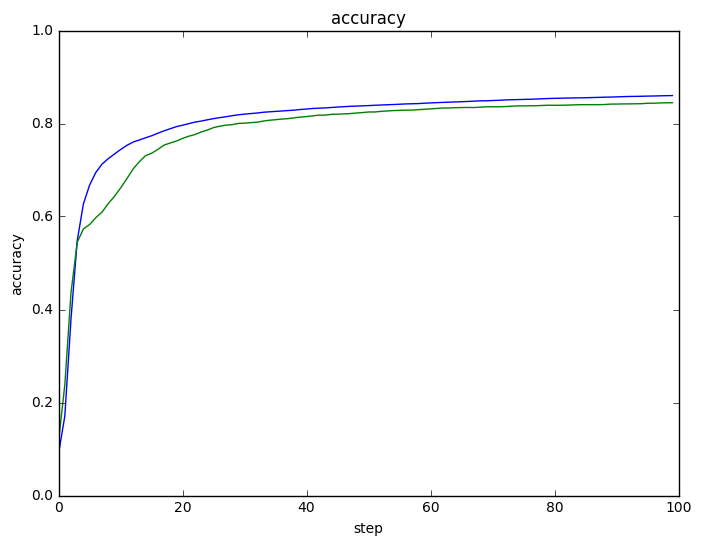

In [19]:
ohm.plot_result2(result[2], result[3], "accuracy", "step", "accuracy")